In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

ModuleNotFoundError: No module named 'missingno'

In [5]:
stroke_df = pd.read_csv('./healthcare-dataset-stroke-data.csv', index_col="id") 


In [6]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [7]:
num_cols = ['stroke', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
stroke_df[num_cols]     
# 수치형 데이터만 columns 생성 

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi
id,,,,,,
9046,1,67.0,0,1,228.69,36.6
51676,1,61.0,0,0,202.21,NaN
31112,1,80.0,0,1,105.92,32.5
60182,1,49.0,0,0,171.23,34.4
1665,1,79.0,1,0,174.12,24.0
...,...,...,...,...,...,...
18234,0,80.0,1,0,83.75,NaN
44873,0,81.0,0,0,125.20,40.0
19723,0,35.0,0,0,82.99,30.6


In [8]:
stroke_df.describe() 
# 통계요약 정보 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: >

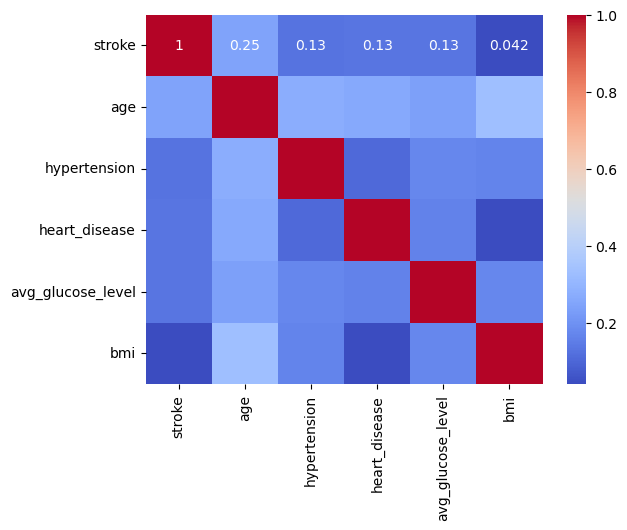

In [9]:
# 상관 관계 분석 
# feature, stroke 가장 높은 상관관계 
sns.heatmap(data=stroke_df[num_cols].corr(), annot=True, cmap='coolwarm')



<Axes: xlabel='age', ylabel='stroke'>

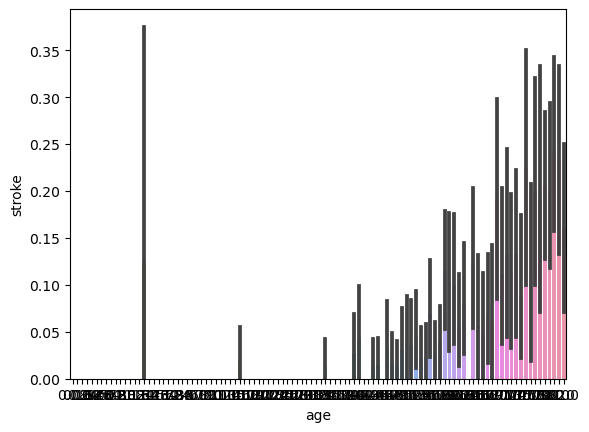

In [10]:
sns.barplot(data=stroke_df, x = 'age', y = 'stroke')


e:\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

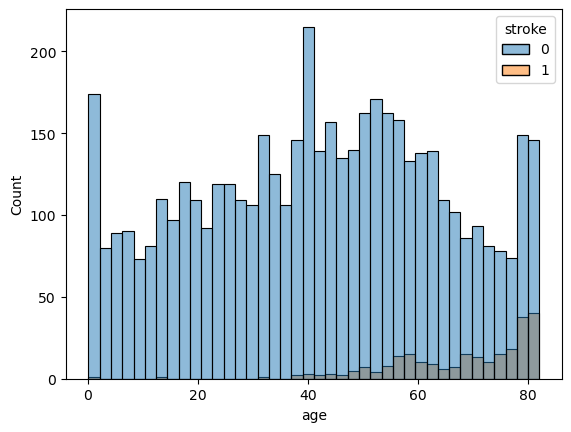

In [11]:
sns.histplot(data=stroke_df, x = 'age', hue='stroke', bins=40) 
# 나이는 뇌졸중 발병 확률가 높은 상관관계를 가지고 있다. 

e:\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

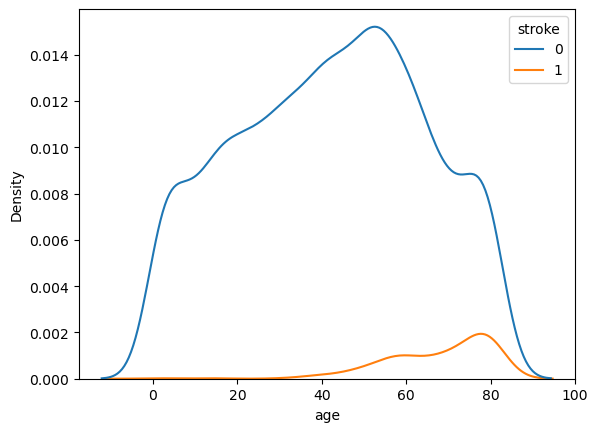

In [12]:
sns.kdeplot(data=stroke_df, x = 'age', hue='stroke')


<Axes: xlabel='hypertension', ylabel='stroke'>

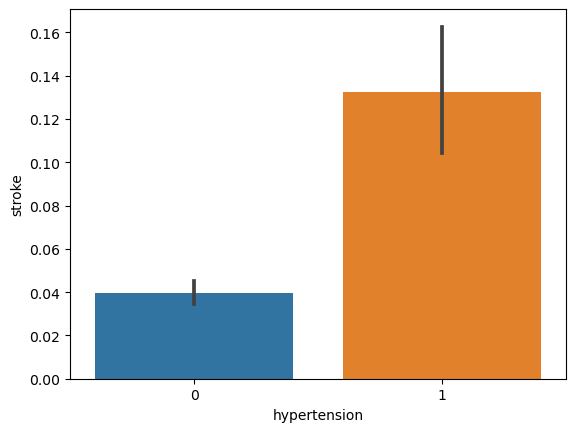

In [13]:
sns.barplot(data=stroke_df, x = 'hypertension', y = 'stroke')
# 고혈압은 뇌졸중과 높은 상관계수 

<Axes: xlabel='heart_disease', ylabel='stroke'>

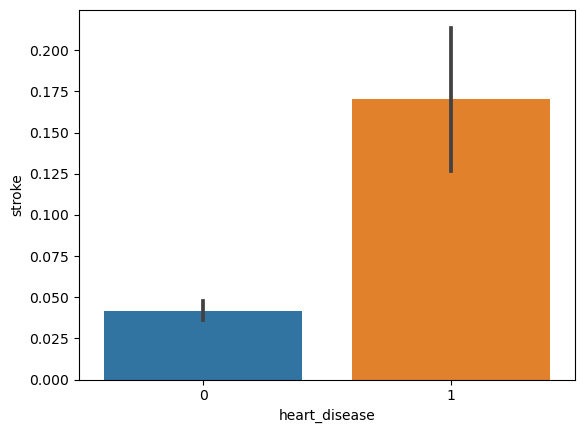

In [14]:
sns.barplot(data=stroke_df, x = 'heart_disease', y = 'stroke')
# 심장병 또한 높은 상반관계 

e:\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

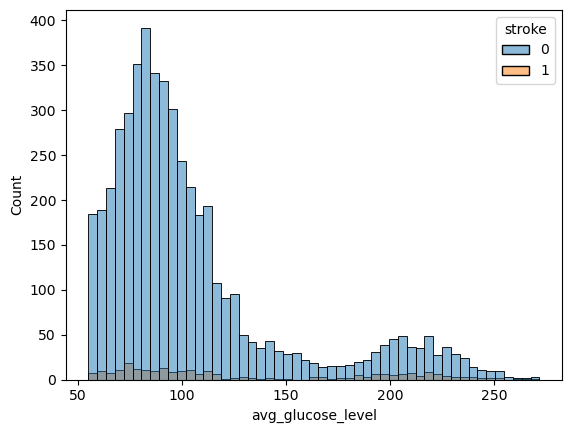

In [15]:
sns.histplot(data=stroke_df, x = 'avg_glucose_level', hue='stroke')
# avg_glucose_level: blue

In [16]:
stroke_df['bmi'].count() 


4909

In [17]:
stroke_df['bmi'].size

5110

In [18]:
##상관관계 분석
# 나이> 심장병> 뇌졸증 > 고혈압 > bmi 

In [19]:
## 범주형 데이터만 분류한 column생성 
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
stroke_df[cat_cols]

,gender,ever_married,work_type,Residence_type,smoking_status
id,,,,,
9046,Male,Yes,Private,Urban,formerly smoked
51676,Female,Yes,Self-employed,Rural,never smoked
31112,Male,Yes,Private,Rural,never smoked
60182,Female,Yes,Private,Urban,smokes
1665,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
18234,Female,Yes,Private,Urban,never smoked
44873,Female,Yes,Self-employed,Urban,never smoked
19723,Female,Yes,Self-employed,Rural,never smoked


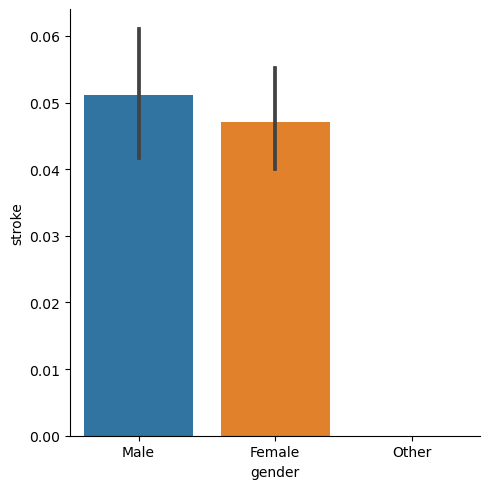

In [20]:
# gender // stroke
sns.catplot(data=stroke_df, x = 'gender', y = 'stroke', kind='bar')


In [21]:
stroke_df[['gender','stroke']].groupby(by='gender').mean()

,stroke
gender,
Female,0.047094
Male,0.051064
Other,0.000000


In [22]:
stroke_df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

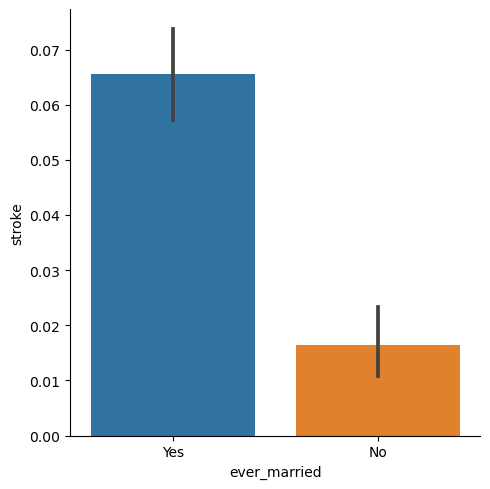

In [23]:
# ever_married / stroke
sns.catplot(data=stroke_df, x='ever_married', y='stroke', kind='bar')


In [24]:
stroke_df[['ever_married', 'stroke']].groupby(by='ever_married').mean()
# 결혼 한적이 있는 사람 stroke발생률이 높다 

,stroke
ever_married,
No,0.016505
Yes,0.065613


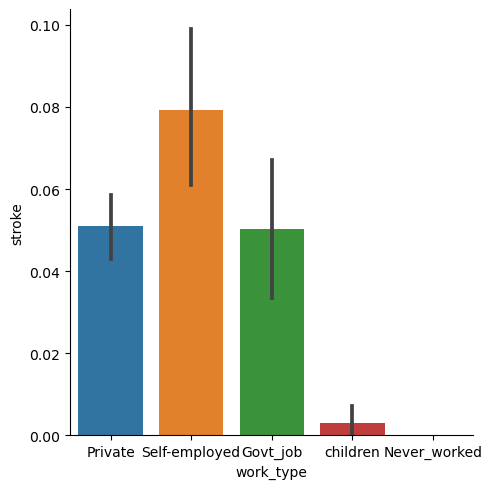

In [25]:
sns.catplot(data=stroke_df, x = 'work_type', y='stroke', kind='bar')


In [26]:
stroke_df[['work_type','stroke']].groupby(by='work_type').mean()


,stroke
work_type,
Govt_job,0.050228
Never_worked,0.000000
Private,0.050940
Self-employed,0.079365
children,0.002911


In [27]:
stroke_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='bmi'>

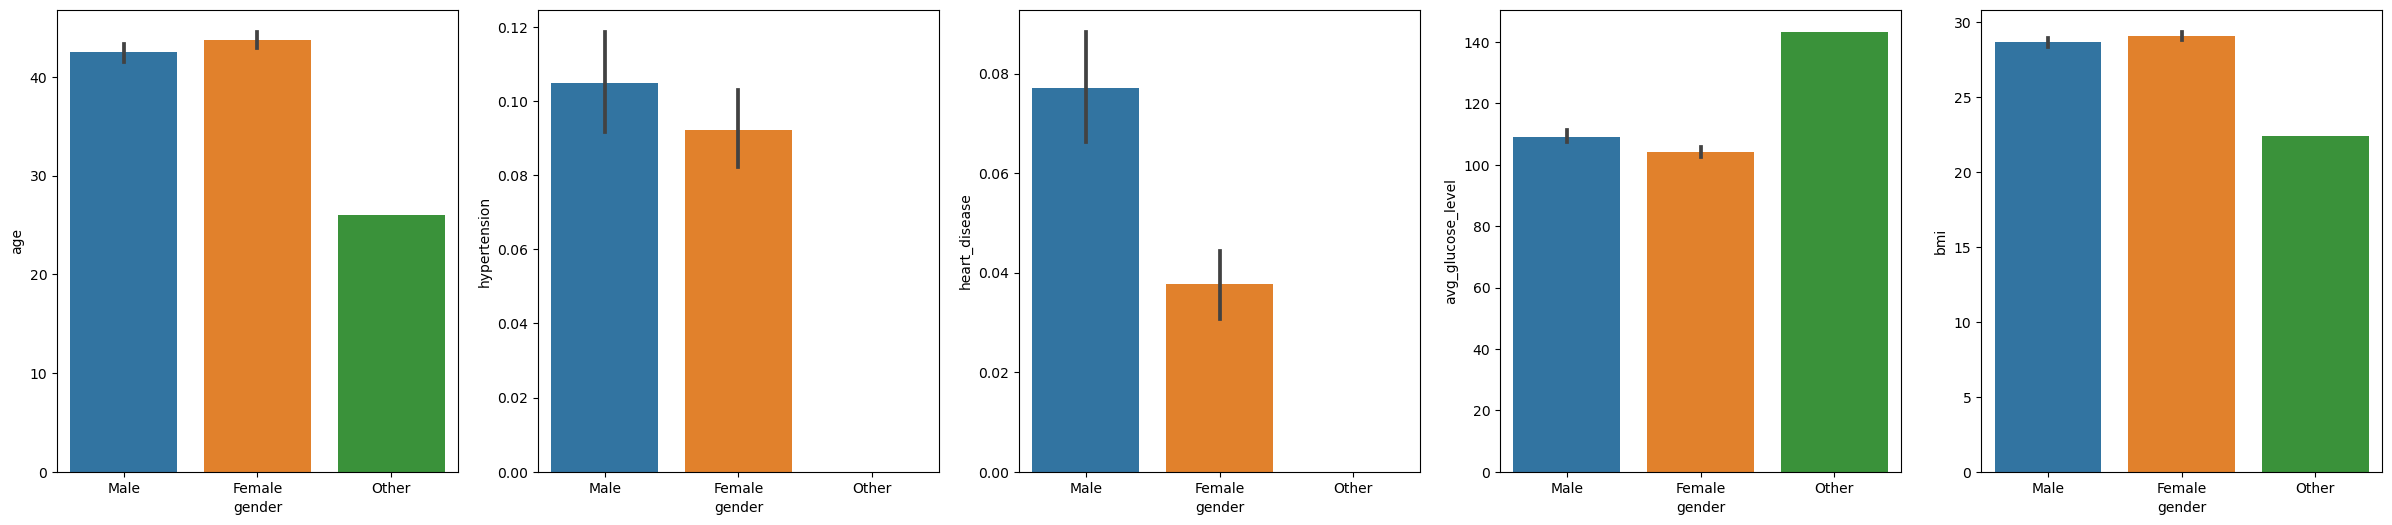

In [28]:
#  gender과 다른 feature의 연관성
#### 고혈압이나 심장병 그리고 평균혈당수치와 bmi수치에 대한 성별간 분류
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(30,6))
sns.barplot(x='gender',y='age',data=stroke_df,ax=axs[0])
sns.barplot(x='gender',y='hypertension',data=stroke_df,ax=axs[1])
sns.barplot(x='gender',y='heart_disease',data=stroke_df,ax=axs[2])
sns.barplot(x='gender',y='avg_glucose_level',data=stroke_df,ax=axs[3])
sns.barplot(x='gender',y='bmi',data=stroke_df,ax=axs[4])

<Axes: xlabel='hypertension', ylabel='bmi'>

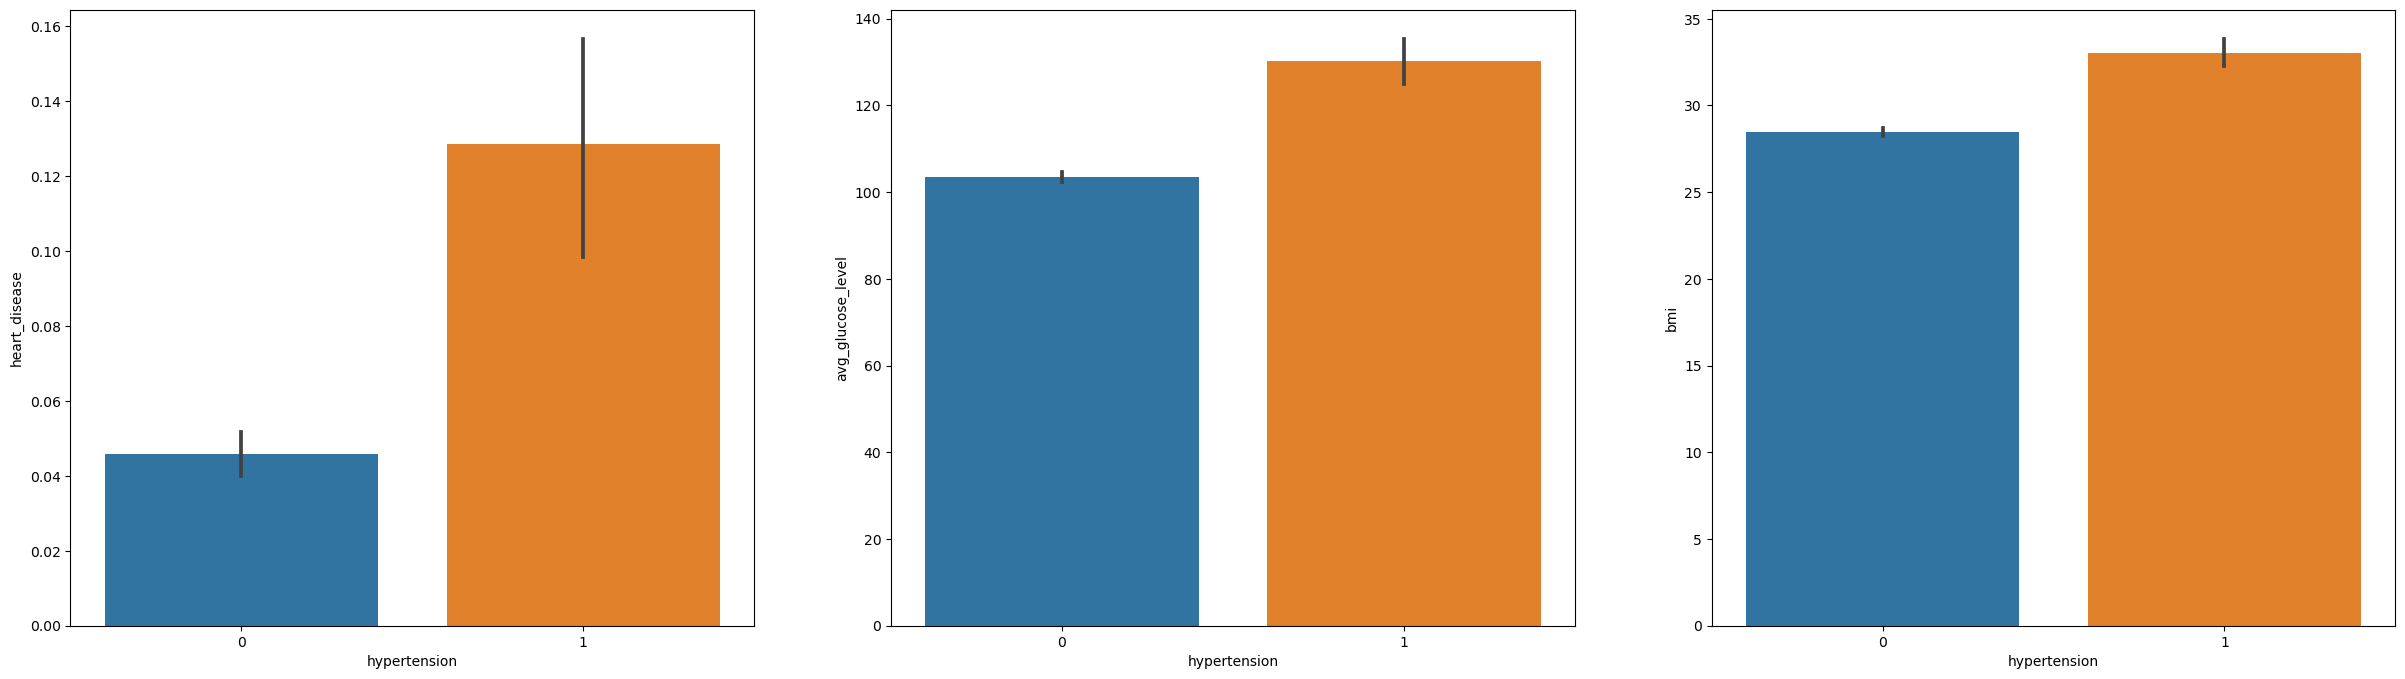

In [29]:
    # hypertension과 다른 feature의 연관성
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
sns.barplot(x='hypertension',y='heart_disease',data=stroke_df,ax=axs[0]) 
sns.barplot(x='hypertension',y='avg_glucose_level',data=stroke_df,ax=axs[1])
sns.barplot(x='hypertension',y='bmi',data=stroke_df,ax=axs[2])

# 0없는 경우
# 1있는 경우 
# 결과 도출: 고혈압을 가지고 있으면 전반적으로 건강x


<Axes: xlabel='ever_married', ylabel='hypertension'>

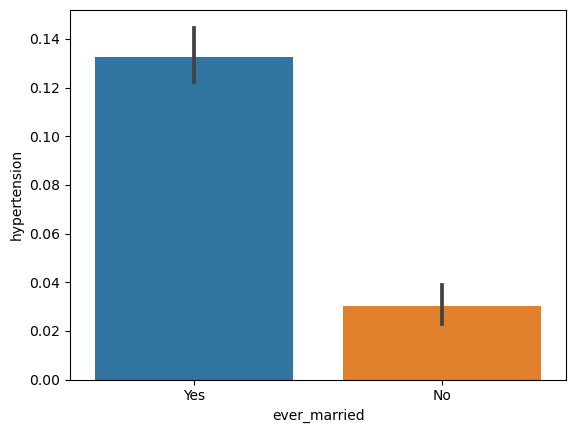

In [30]:
sns.barplot(x='ever_married',y='hypertension',data=stroke_df) 
# 기혼자가 고혈합일 확률이 높다 

<Axes: xlabel='work_type', ylabel='hypertension'>

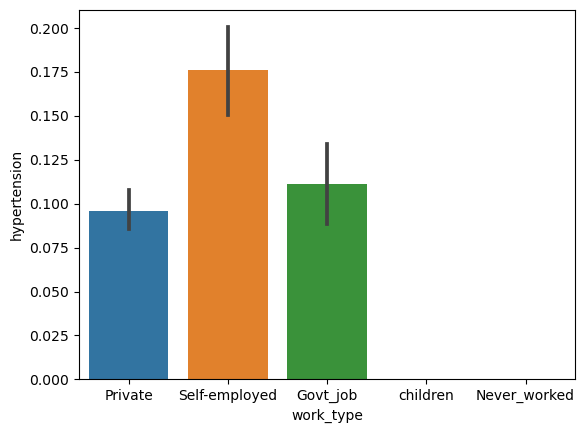

In [31]:
sns.barplot(x='work_type', y='hypertension',data=stroke_df) 
# 자영업자가 직장인 보다 고열합이 높게 나타난다

<Axes: xlabel='Residence_type', ylabel='hypertension'>

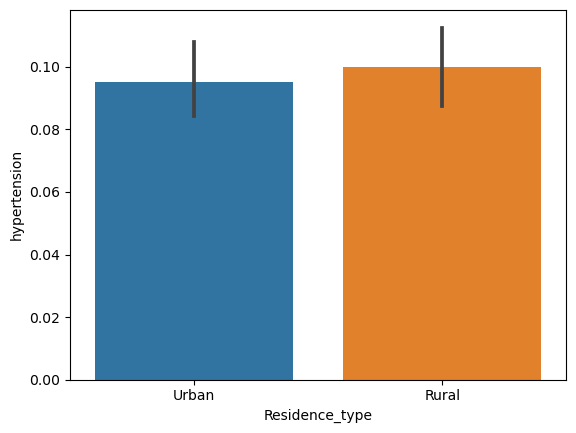

In [32]:
sns.barplot(x='Residence_type',y='hypertension',data=stroke_df) 
# 값 균등 

<Axes: xlabel='smoking_status', ylabel='hypertension'>

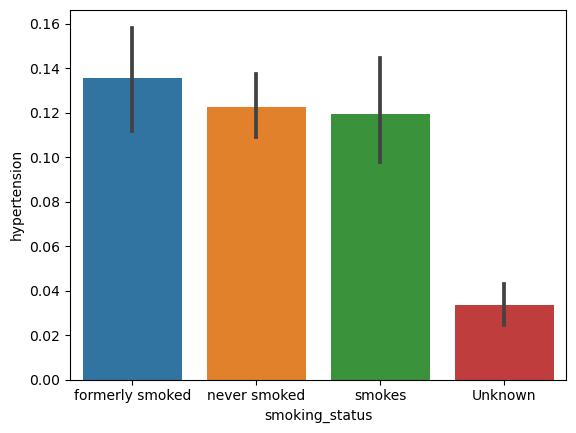

In [33]:
sns.barplot(x='smoking_status', y='hypertension',data=stroke_df)
# 고혈압과 흡연은 서로 상관관계가 별로 없다 

<Axes: xlabel='heart_disease', ylabel='bmi'>

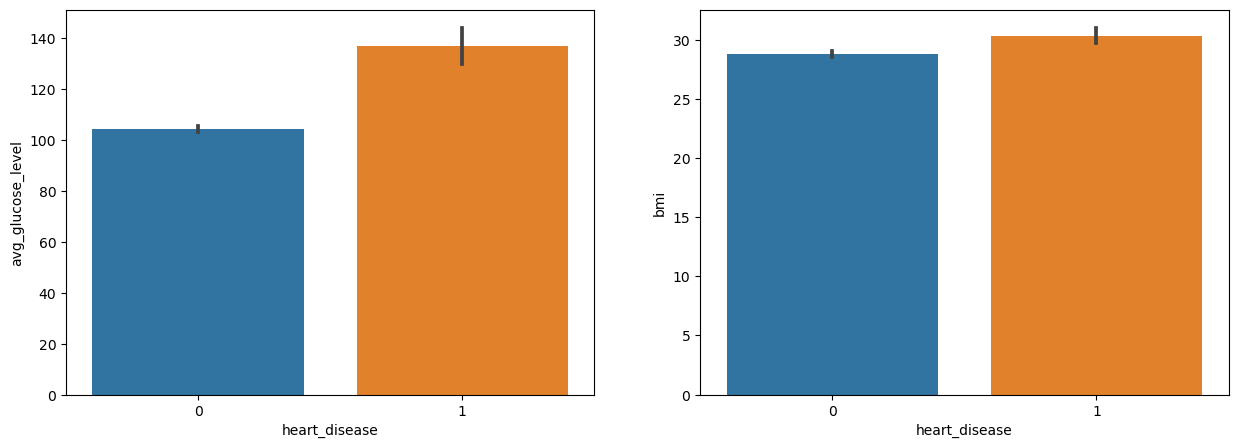

In [34]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.barplot(x='heart_disease',y='avg_glucose_level', data=stroke_df,ax=axs[0])
sns.barplot(x='heart_disease',y='bmi',data=stroke_df,ax=axs[1])


In [ ]:
def fun1(x):
    return (-1*0.0062*x*x) + (0.5566*x) + 19.369
stroke_df['bmi']=stroke_df['bmi'].fillna(fun1(stroke_df['age']))
# 결손치를 채워줌 